# Exploring Iris feature

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from ydata_profiling import ProfileReport

from sklearn import preprocessing
#librairies pour la SOM
from minisom import MiniSom

#librairies pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
data = load_iris()

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
input_data, output_data = data.data, data.target

In [7]:
input_data.shape,output_data.shape

((150, 4), (150,))

In [8]:
X = np.concatenate([input_data,output_data.reshape(-1,1)],axis=1)

## generate Data profiling (Univariate and bi-variate statistics)

In [9]:
X = pd.DataFrame(X,columns=['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)','target']
            )
X["target"] = X["target"].astype(int)

In [10]:
# profile = ProfileReport(X, title ="Profiling Iris dataset")
# profile.to_file(output_file = 'Global_Profile_IRIS_dataset.htm')

In [11]:
y =  X.iloc[:,-1]
X = X.iloc[:,:-1] 

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

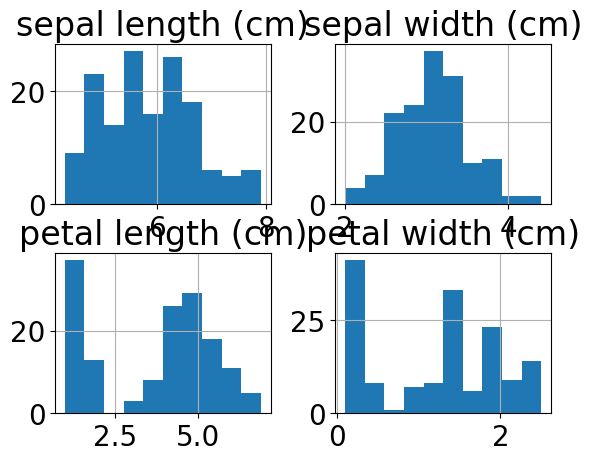

In [12]:
X.hist()

In [13]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled.shape

(150, 4)

## SOM

In [15]:
size = 10
som = MiniSom(size, size, len(X_scaled[0]),
              neighborhood_function='gaussian', sigma=3.5,
              random_seed=1)

som.pca_weights_init(X_scaled)
som.train_random(X_scaled, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.3796101277199357


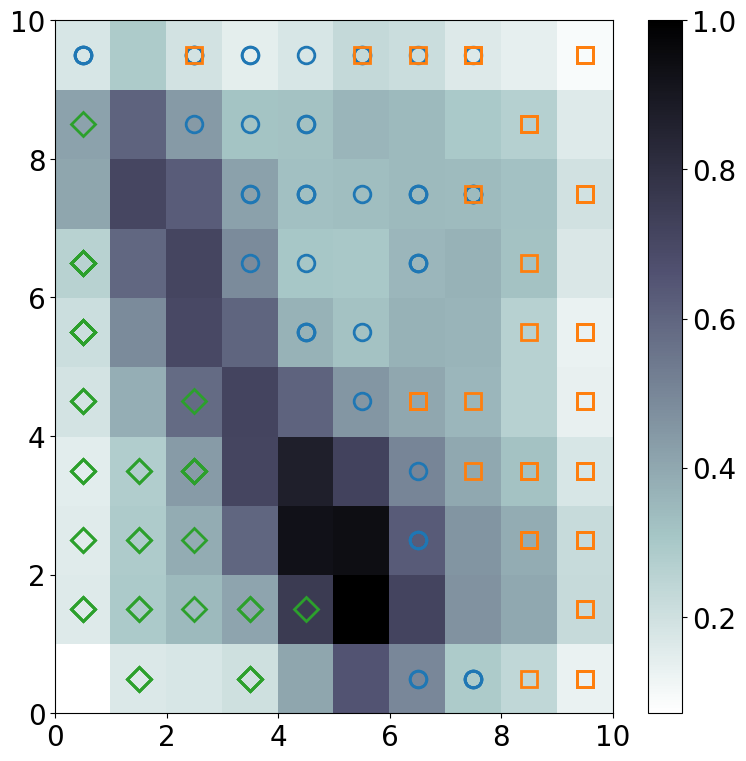

In [16]:
target = data.target

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)

plt.show()

In [17]:
feature_names = list(X.columns)

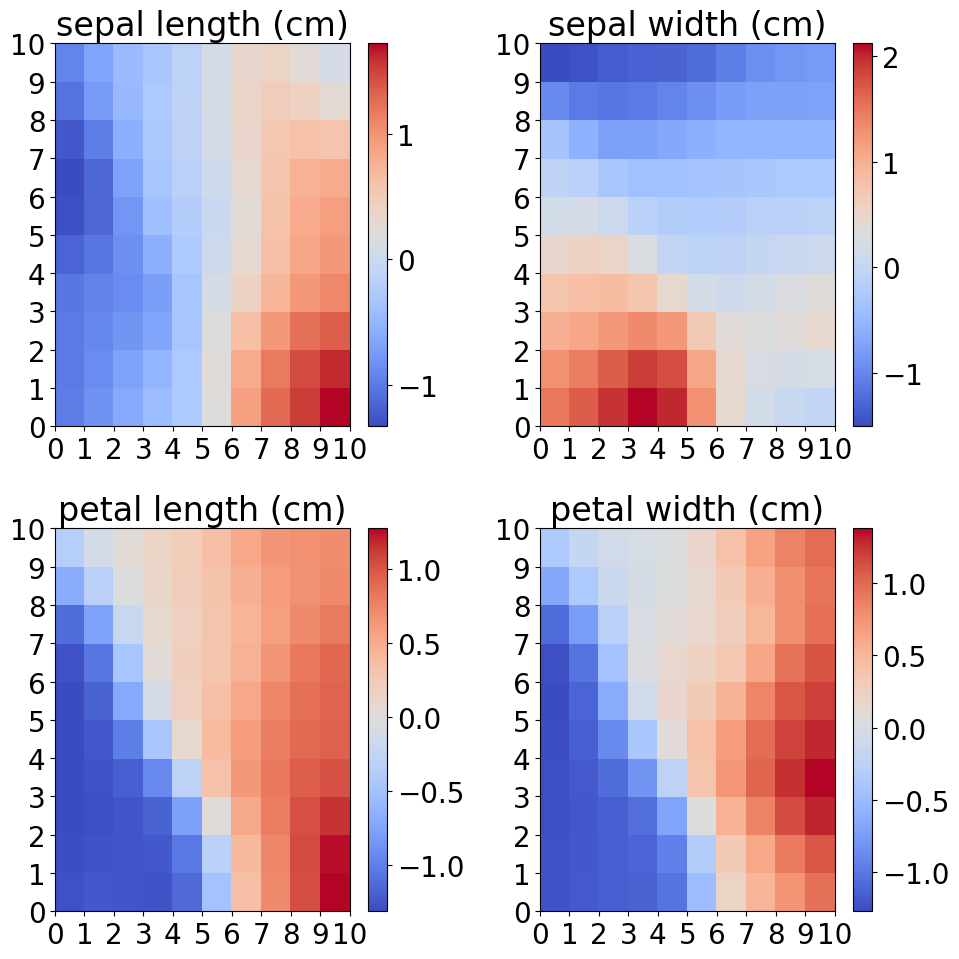

In [18]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
    plt.colorbar()
plt.tight_layout()
plt.savefig("IRIS SOM.png",bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

In [19]:
W.shape

(10, 10, 4)

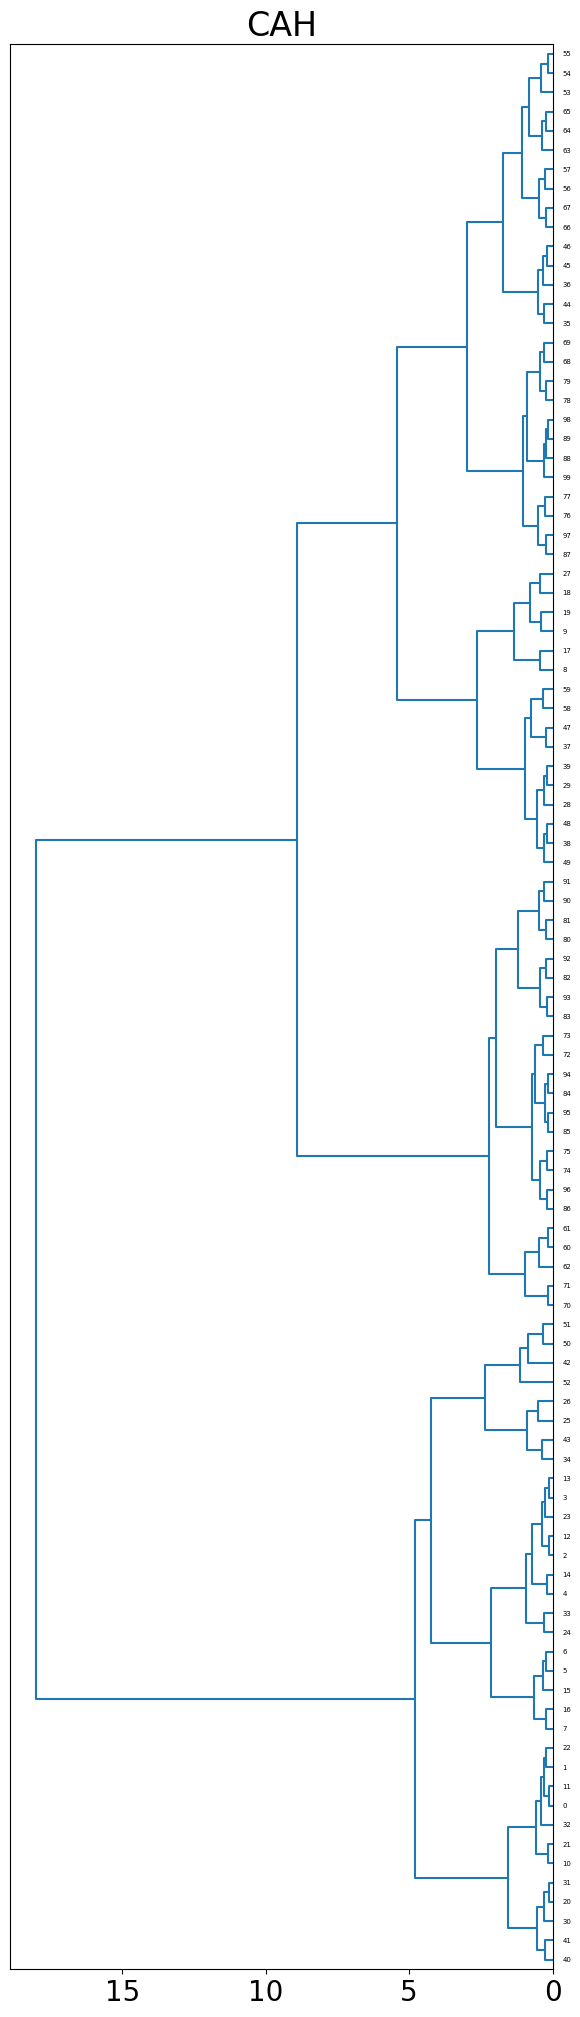

In [20]:
W_ = W.reshape((10*10,4))
#générer la matrice des liens
Z = linkage(W_,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.figure(figsize=(7,25))
plt.title("CAH")
dendrogram(Z,labels=range(10*10),orientation='left',color_threshold=0)
plt.show()

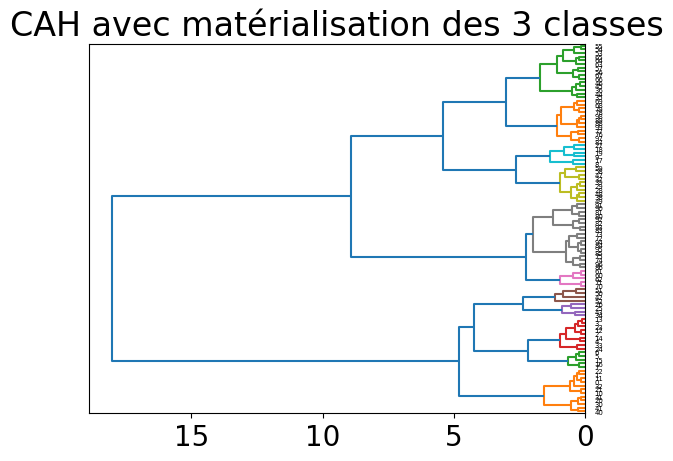

[ 1  1  3  3  3  2  2  2  9  9  1  1  3  3  3  2  2  9  9  9  1  1  1  3
  3  4  4  9  8  8  1  1  1  3  4 11 11  8  8  8  1  1  5  4 11 11 11  8
  8  8  5  5  5 11 11 11 11 11  8  8  6  6  6 11 11 11 11 11 10 10  6  6
  7  7  7  7 10 10 10 10  7  7  7  7  7  7  7 10 10 10  7  7  7  7  7  7
  7 10 10 10]


In [21]:
#matérialisation des 4 classes (hauteur t = 7)
plt.title('CAH avec matérialisation des 3 classes')
T = 2
dendrogram(Z,labels=range(10*10),orientation='left',color_threshold=T)
plt.show()
groupes_cah = fcluster(Z,t=T,criterion='distance')
print(groupes_cah)

In [22]:
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(np.arange(10*10)[idg],groupes_cah[idg]))

     0
1    0
1   41
1   40
1   32
1   31
..  ..
11  54
11  55
11  56
11  46
11  57

[100 rows x 1 columns]


In [23]:
SOM_assignment = groupes_cah.reshape((10,10))

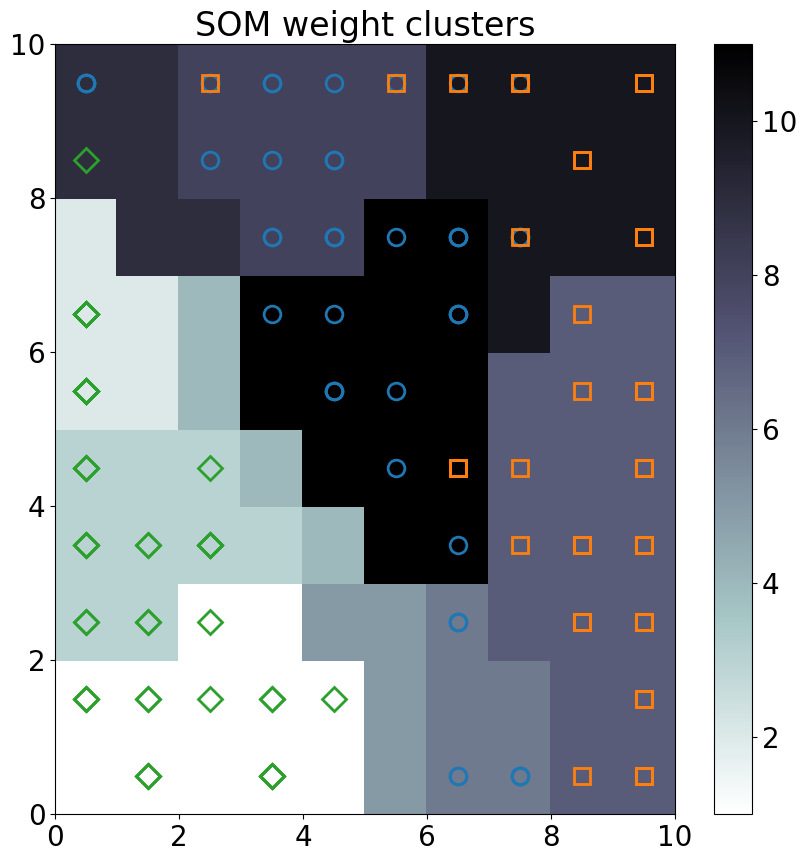

In [24]:
target = SOM_assignment

plt.figure(figsize=(10,10))

plt.pcolor(target.T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

target = data.target

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)
    plt.title("SOM weight clusters")
plt.savefig("IRIS CLUSTERS.png",bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

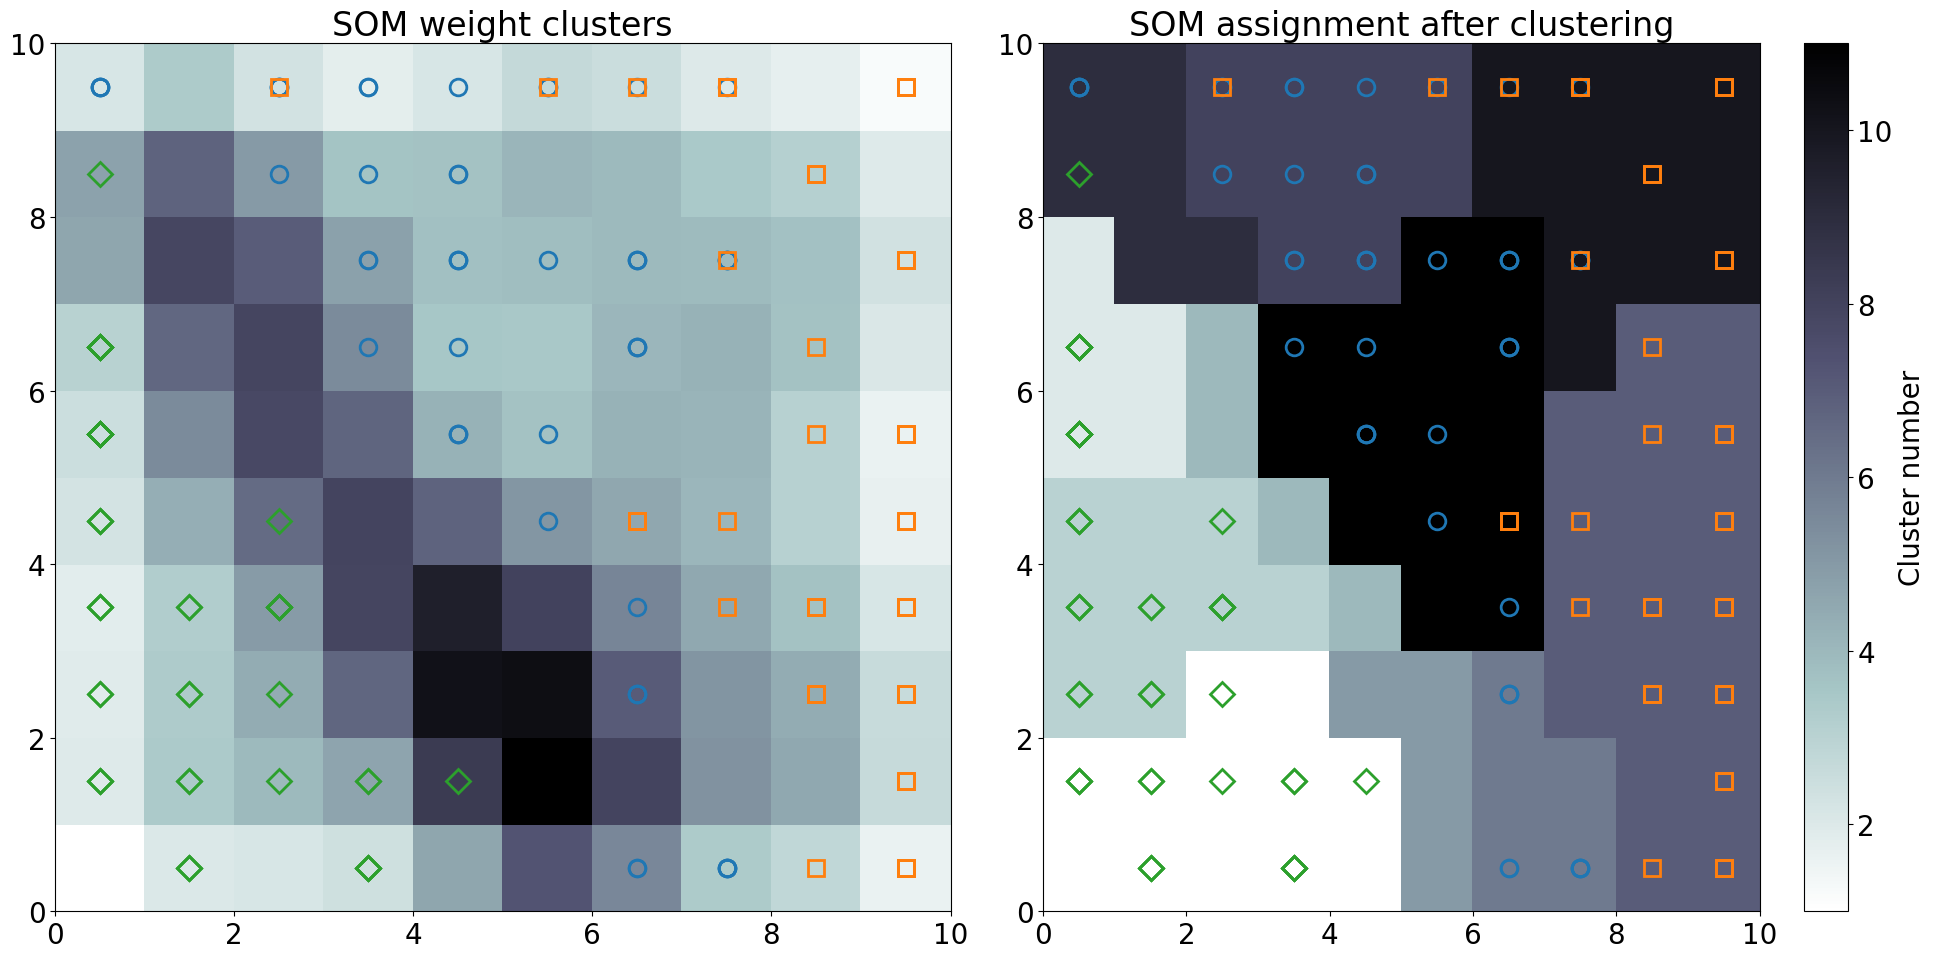

In [25]:
import matplotlib.pyplot as plt

# Assuming you have already defined 'som', 'X_scaled', 'data', 'SOM_assignment', 'target', 'markers', and 'colors'

# Create a figure and a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first plot on the first subplot
axes[0].pcolor(som.distance_map().T, cmap='bone_r')
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)
    axes[0].plot(w[0]+0.5, w[1]+0.5, markers[target[cnt]-1], markerfacecolor='None',
                 markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)
axes[0].set_title("SOM weight clusters")
# axes[0].axis('off')

# Plot the second plot on the second subplot
im = axes[1].pcolor(SOM_assignment.T, cmap='bone_r')
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)
    axes[1].plot(w[0]+0.5, w[1]+0.5, markers[target[cnt]-1], markerfacecolor='None',
                 markeredgecolor=colors[target[cnt]-1], markersize=12, markeredgewidth=2)
axes[1].set_title("SOM assignment after clustering")
# axes[1].axis('off')

# Add a colorbar for the second plot
cbar = plt.colorbar(im, ax=axes[1])
cbar.ax.set_ylabel('Cluster number', rotation=90)

# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("side_by_side_plots.png", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()


In [26]:
np.flip(SOM_assignment.T,axis=0)

array([[ 9,  9,  8,  8,  8,  8, 10, 10, 10, 10],
       [ 9,  9,  8,  8,  8,  8, 10, 10, 10, 10],
       [ 2,  9,  9,  8,  8, 11, 11, 10, 10, 10],
       [ 2,  2,  4, 11, 11, 11, 11, 10,  7,  7],
       [ 2,  2,  4, 11, 11, 11, 11,  7,  7,  7],
       [ 3,  3,  3,  4, 11, 11, 11,  7,  7,  7],
       [ 3,  3,  3,  3,  4, 11, 11,  7,  7,  7],
       [ 3,  3,  1,  1,  5,  5,  6,  7,  7,  7],
       [ 1,  1,  1,  1,  1,  5,  6,  6,  7,  7],
       [ 1,  1,  1,  1,  1,  5,  6,  6,  7,  7]], dtype=int32)

In [27]:
classification =[]
for cnt, xx in enumerate(X_scaled):
    w = som.winner(xx)
    classification.append(SOM_assignment[w[0],w[1]])

# SRA model

In [28]:
import sys
import tensorflow as tf
from src.ReinforcementAttention.ReinforcementAttention import MultiHeadReinforcementAttention, ReinforcementAttention
from src.ReinforcementAttention.SelfReinforcementAttention import MultiHeadSelfReinforcementAttention, \
    SelfReinforcementAttention

2023-09-25 22:23:17.923975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

y_train = np.eye(3)[y_train]
y_test = np.eye(3)[y_test]

In [30]:
def model_sra(input_dim,keys_hidden,num_class) -> tf.keras.Model:
    input_1 = tf.keras.layers.Input(shape=(input_dim,))
    x = SelfReinforcementAttention(input_dim, (input_dim, 8), False,)(input_1)
    x = tf.keras.layers.Dense(num_class,activation = 'sigmoid')(x)
    model = tf.keras.Model(inputs=input_1, outputs=x)  # SRA
    print('model SRA created!')
    return model

model = model_sra(4,(16,),3)

model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

model.summary()

for input KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'") the out shape is (None, 4, 8) and this is a
for input KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'") the out shape is (None, 4, 8) and this is a
This is the attention vector shape (None, 4)
model SRA created!
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 self_reinforcement_attentio  (None, 4)                472       
 n (SelfReinforcementAttenti                                     
 on)                                                             
                                                                 

2023-09-25 22:23:18.765285: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 22:23:18.766629: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
history = model.fit(X_train, y_train, epochs=1000, batch_size = X_train.shape[0])


Epoch 1/1000
1/1 [==============================] - 1s 605ms/step - loss: 0.7483 - accuracy: 0.3333
Epoch 2/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7466 - accuracy: 0.3429
Epoch 3/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7449 - accuracy: 0.3429
Epoch 4/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.7433 - accuracy: 0.3333
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.7416 - accuracy: 0.3333
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.7399 - accuracy: 0.3333
Epoch 7/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.7383 - accuracy: 0.3333
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7366 - accuracy: 0.3333
Epoch 9/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.7350 - accuracy: 0.3333
Epoch 10/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.7333 - accuracy: 0.3333
Epoch 11/10

1/1 [==============================] - 0s 10ms/step - loss: 0.6214 - accuracy: 0.4952
Epoch 84/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6199 - accuracy: 0.4952
Epoch 85/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.6185 - accuracy: 0.4952
Epoch 86/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6171 - accuracy: 0.4952
Epoch 87/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.6156 - accuracy: 0.4952
Epoch 88/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6142 - accuracy: 0.4952
Epoch 89/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.6128 - accuracy: 0.4952
Epoch 90/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.6114 - accuracy: 0.5048
Epoch 91/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6100 - accuracy: 0.5048
Epoch 92/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.6086 - accuracy: 0.5048
Epoch 93/1000
1/

1/1 [==============================] - 0s 10ms/step - loss: 0.5234 - accuracy: 0.5905
Epoch 165/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.5224 - accuracy: 0.5905
Epoch 166/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5215 - accuracy: 0.5905
Epoch 167/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5206 - accuracy: 0.5905
Epoch 168/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5196 - accuracy: 0.5905
Epoch 169/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5187 - accuracy: 0.5905
Epoch 170/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.5178 - accuracy: 0.5905
Epoch 171/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5169 - accuracy: 0.5905
Epoch 172/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.5160 - accuracy: 0.5905
Epoch 173/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.5151 - accuracy: 0.5905
Epoch 174/10

1/1 [==============================] - 0s 10ms/step - loss: 0.4577 - accuracy: 0.6857
Epoch 246/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4569 - accuracy: 0.6857
Epoch 247/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.4561 - accuracy: 0.6857
Epoch 248/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4553 - accuracy: 0.6857
Epoch 249/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4545 - accuracy: 0.6952
Epoch 250/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4538 - accuracy: 0.7048
Epoch 251/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.4530 - accuracy: 0.7048
Epoch 252/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.4522 - accuracy: 0.7048
Epoch 253/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4514 - accuracy: 0.7048
Epoch 254/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4506 - accuracy: 0.7048
Epoch 255/100

Epoch 327/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.3873 - accuracy: 0.8190
Epoch 328/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3864 - accuracy: 0.8190
Epoch 329/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3854 - accuracy: 0.8190
Epoch 330/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3844 - accuracy: 0.8190
Epoch 331/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3834 - accuracy: 0.8190
Epoch 332/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3824 - accuracy: 0.8190
Epoch 333/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8190
Epoch 334/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3804 - accuracy: 0.8190
Epoch 335/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3794 - accuracy: 0.8190
Epoch 336/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.3784 - accuracy: 0.8190


1/1 [==============================] - 0s 6ms/step - loss: 0.3004 - accuracy: 0.8476
Epoch 409/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2994 - accuracy: 0.8476
Epoch 410/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2983 - accuracy: 0.8476
Epoch 411/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2973 - accuracy: 0.8476
Epoch 412/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2963 - accuracy: 0.8476
Epoch 413/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.2952 - accuracy: 0.8476
Epoch 414/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2942 - accuracy: 0.8476
Epoch 415/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2932 - accuracy: 0.8476
Epoch 416/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2922 - accuracy: 0.8476
Epoch 417/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2911 - accuracy: 0.8476
Epoch 418/1

1/1 [==============================] - 0s 10ms/step - loss: 0.2316 - accuracy: 0.8762
Epoch 490/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.2309 - accuracy: 0.8857
Epoch 491/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2303 - accuracy: 0.8857
Epoch 492/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2296 - accuracy: 0.8857
Epoch 493/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2289 - accuracy: 0.8857
Epoch 494/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2283 - accuracy: 0.8857
Epoch 495/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2276 - accuracy: 0.8857
Epoch 496/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2270 - accuracy: 0.8857
Epoch 497/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.2263 - accuracy: 0.8857
Epoch 498/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2257 - accuracy: 0.8857
Epoch 499/

1/1 [==============================] - 0s 4ms/step - loss: 0.1859 - accuracy: 0.9143
Epoch 571/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1855 - accuracy: 0.9143
Epoch 572/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1850 - accuracy: 0.9143
Epoch 573/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1846 - accuracy: 0.9143
Epoch 574/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1841 - accuracy: 0.9143
Epoch 575/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1837 - accuracy: 0.9143
Epoch 576/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1832 - accuracy: 0.9143
Epoch 577/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1828 - accuracy: 0.9143
Epoch 578/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1824 - accuracy: 0.9143
Epoch 579/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1819 - accuracy: 0.9238
Epoch 580/1000


1/1 [==============================] - 0s 5ms/step - loss: 0.1565 - accuracy: 0.9429
Epoch 652/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1563 - accuracy: 0.9429
Epoch 653/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1560 - accuracy: 0.9429
Epoch 654/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1557 - accuracy: 0.9429
Epoch 655/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.9429
Epoch 656/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1552 - accuracy: 0.9429
Epoch 657/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1549 - accuracy: 0.9429
Epoch 658/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1547 - accuracy: 0.9429
Epoch 659/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1544 - accuracy: 0.9429
Epoch 660/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1542 - accuracy: 0.9429
Epoch 661/100

1/1 [==============================] - 0s 4ms/step - loss: 0.1392 - accuracy: 0.9429
Epoch 733/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1391 - accuracy: 0.9429
Epoch 734/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 0.9429
Epoch 735/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.1387 - accuracy: 0.9429
Epoch 736/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1385 - accuracy: 0.9429
Epoch 737/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1384 - accuracy: 0.9429
Epoch 738/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1382 - accuracy: 0.9429
Epoch 739/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1380 - accuracy: 0.9429
Epoch 740/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.9429
Epoch 741/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1377 - accuracy: 0.9429
Epoch 742/1000

Epoch 814/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1273 - accuracy: 0.9429
Epoch 815/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1272 - accuracy: 0.9429
Epoch 816/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1271 - accuracy: 0.9429
Epoch 817/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1270 - accuracy: 0.9429
Epoch 818/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1268 - accuracy: 0.9429
Epoch 819/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1267 - accuracy: 0.9429
Epoch 820/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1266 - accuracy: 0.9429
Epoch 821/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1265 - accuracy: 0.9429
Epoch 822/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1264 - accuracy: 0.9429
Epoch 823/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1262 - accuracy: 0.9429

1/1 [==============================] - 0s 9ms/step - loss: 0.1183 - accuracy: 0.9524
Epoch 896/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1182 - accuracy: 0.9524
Epoch 897/1000
1/1 [==============================] - 0s 23ms/step - loss: 0.1181 - accuracy: 0.9524
Epoch 898/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1180 - accuracy: 0.9524
Epoch 899/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.1179 - accuracy: 0.9524
Epoch 900/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1178 - accuracy: 0.9524
Epoch 901/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.1177 - accuracy: 0.9524
Epoch 902/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1176 - accuracy: 0.9524
Epoch 903/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1175 - accuracy: 0.9524
Epoch 904/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1174 - accuracy: 0.9524
Epoch 905/10

1/1 [==============================] - 0s 4ms/step - loss: 0.1108 - accuracy: 0.9524
Epoch 977/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1107 - accuracy: 0.9524
Epoch 978/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1106 - accuracy: 0.9524
Epoch 979/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.1105 - accuracy: 0.9524
Epoch 980/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1105 - accuracy: 0.9524
Epoch 981/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1104 - accuracy: 0.9524
Epoch 982/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.1103 - accuracy: 0.9524
Epoch 983/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1102 - accuracy: 0.9524
Epoch 984/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1101 - accuracy: 0.9524
Epoch 985/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.1100 - accuracy: 0.9524
Epoch 986/100

In [32]:
score = model.evaluate(X_test, y_test, verbose=0) 
score

[0.11056388914585114, 0.8888888955116272]

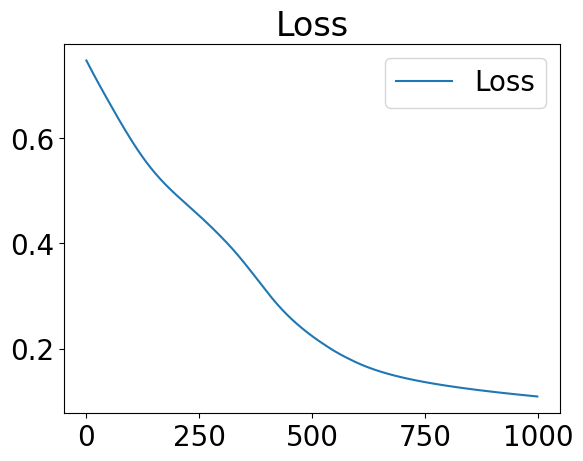

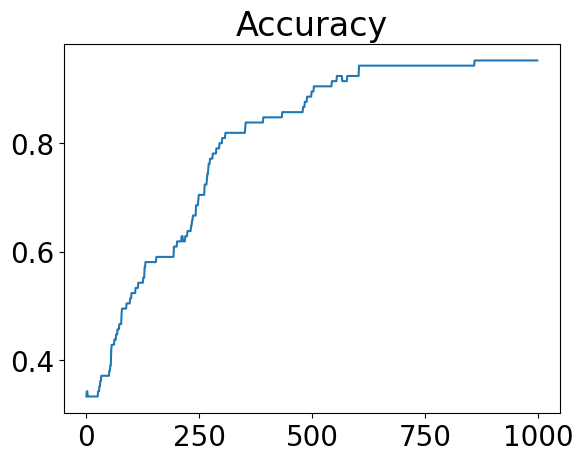

In [33]:
plt.plot(np.arange(0,len(history.history['loss'])), history.history['loss'],label = "Loss")
plt.title("Loss")
plt.legend()
plt.show()
plt.plot(np.arange(0,len(history.history['accuracy'])), history.history['accuracy'])
plt.title("Accuracy")
plt.show()

## Visualize attention weights

In [34]:
layer_name = model.layers[1].name

In [35]:
# Retrieve the layer object using the layer name
layer_model = model.get_layer(layer_name)
# Print the name of the layer
print(layer_name)

self_reinforcement_attention


In [36]:
attn_wts = []
o_vec = []
labels = []
for i, j, c in zip(X_train,layer_model.model_([X_train,X_train]).numpy(),y_train):
    attn_wts.append(j/i)
    o_vec.append(j)
    labels.append(c)
attention_weights = np.array(attn_wts)

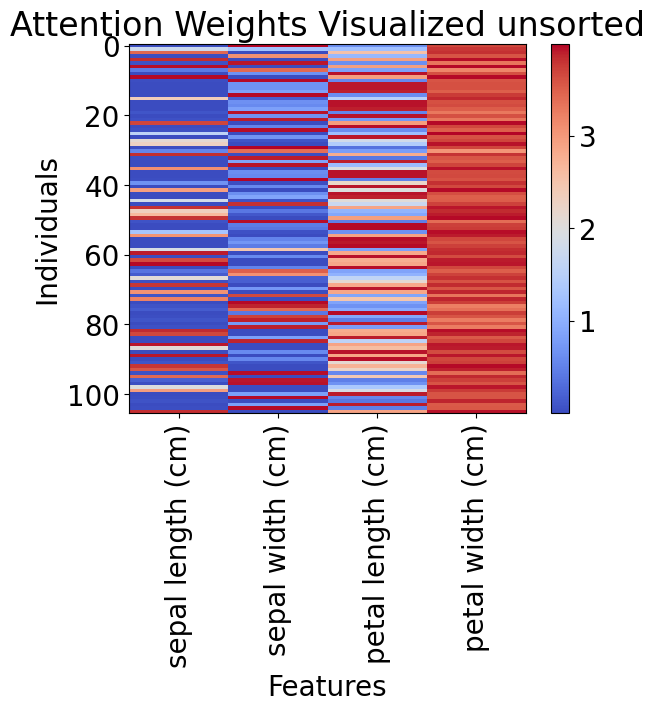

In [37]:
import matplotlib.colors as colors

num_rows, num_cols = attention_weights.shape
weights = attention_weights.reshape(num_rows, num_cols)


# plt.figure(figsize=(10,10))
plt.imshow(weights, cmap='coolwarm', aspect='auto', extent=[0,weights.shape[1],weights.shape[0],0])
X_plot, Y_plot = np.meshgrid(np.linspace(0, weights.shape[1], weights.shape[1]), np.linspace(0, weights.shape[0], weights.shape[0]))
Z_plot= weights
# With out-of-bounds colors:
# bounds = np.linspace(0, 3, 9)
# norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256,extend = "both")
pcm = plt.pcolormesh(X_plot,Y_plot,Z_plot, cmap='coolwarm')
# The colorbar inherits the "extend" argument from BoundaryNorm.
plt.colorbar(pcm, orientation='vertical')

plt.title(f'Attention Weights Visualized unsorted')
plt.xlabel('Features')
plt.ylabel('Individuals')
x_ticks = np.linspace(0,weights.shape[1],weights.shape[1])
x_tick_labels = list(feature_names)
plt.xticks(x_ticks, x_tick_labels, rotation=90)
# plt.savefig("IRIS global attention weights.png",bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

In [38]:
combined_list = []
for i in range(len(weights)):
    combined_list.append([weights[i],labels[i]])
print(combined_list[0:1])

[[array([0.01653465, 3.98112778, 0.62881291, 3.67007752]), array([0., 1., 0.])]]


In [39]:
feature_names = ("SL","SW","PL","PW")
target_names = ("Seto","Vers", "Virg")

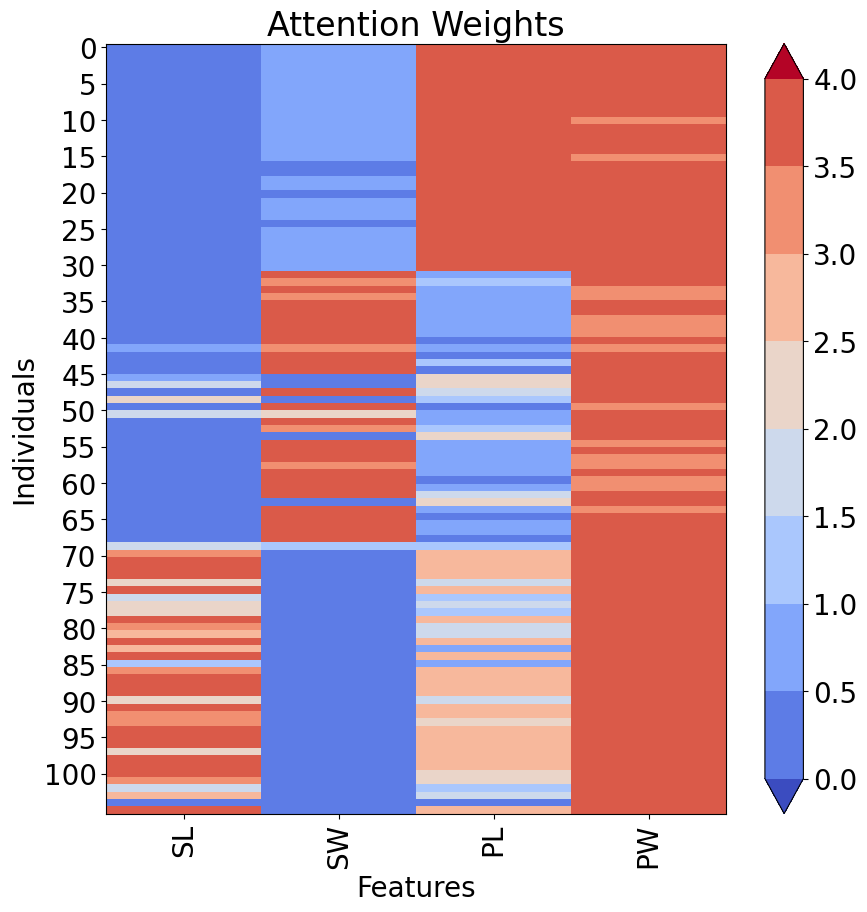

In [40]:
from matplotlib.cm import ScalarMappable
import matplotlib.colors as colors

sorted_data = sorted( combined_list, key=lambda x: x[1].tolist(), reverse=True)

sorted_attention_wts = [x[0] for x in sorted( combined_list, key=lambda x: x[1].tolist(), reverse=True)]
attention_weights_sorted = np.array(sorted_attention_wts)
num_rows, num_cols = attention_weights_sorted.shape
weights = attention_weights_sorted.reshape(num_rows, num_cols)



plt.figure(figsize=(10,10))
plt.imshow(weights, cmap='coolwarm', aspect='auto', extent=[0,weights.shape[1],weights.shape[0],0])

X_plot, Y_plot = np.meshgrid(np.linspace(0, weights.shape[1], weights.shape[1]), np.linspace(0, weights.shape[0], weights.shape[0]))
Z_plot= weights
# With out-of-bounds colors:
bounds = np.linspace(0, 4, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256,extend = "both")
pcm = plt.pcolormesh(X_plot,Y_plot,Z_plot, norm=norm, cmap='coolwarm')
# The colorbar inherits the "extend" argument from BoundaryNorm.
plt.colorbar(pcm, orientation='vertical')

plt.title(f'Attention Weights')
plt.xlabel('Features')
plt.ylabel('Individuals')
x_ticks = np.linspace(0,weights.shape[1],weights.shape[1])
y_ticks = np.arange(0,weights.shape[0],5)
x_tick_labels = list(feature_names)
plt.xticks(x_ticks, x_tick_labels, rotation=90)
plt.yticks(y_ticks)
plt.savefig(fname = f"Attention weights_sorted.png", bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

In [41]:
count_label = np.unique(y_train,axis = 0)
target_array_1 = count_label[0]
target_array_2 = count_label[1]
if count_label.shape[1] == 3:
    target_array_3 = count_label[2]


count_1 = 0
count_2 = 0
indices_1 = []
indices_2 = []
indices_3 = []

for i, item in enumerate(sorted_data):
    if np.array_equal(item[1], target_array_1):
        count_1 += 1
        indices_1.append(i)
    elif np.array_equal(item[1], target_array_2):
        count_2 += 1
        indices_2.append(i)
    elif np.array_equal(item[1], target_array_3):
        indices_3.append(i)

print(f"Count of {target_array_1}: {count_1}")
print(f"Indices of {target_array_1}: {indices_1}")
print(f"Count of {target_array_2}: {count_2}")
print(f"Indices of {target_array_2}: {indices_2}")
if count_label.shape[1] == 3:
    print(f"Indices of {target_array_3}: {indices_3}")

Count of [0. 0. 1.]: 37
Indices of [0. 0. 1.]: [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
Count of [0. 1. 0.]: 37
Indices of [0. 1. 0.]: [31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]
Indices of [1. 0. 0.]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


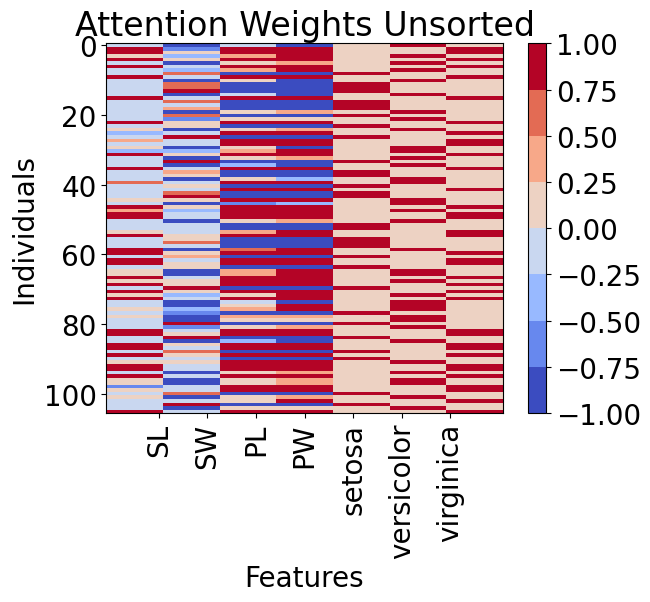

In [42]:
reinforced_vectors = np.array(o_vec)
reinforced_vectors = np.concatenate((reinforced_vectors,y_train),axis = 1)
num_rows, num_cols = reinforced_vectors.shape
weights = reinforced_vectors.reshape(num_rows, num_cols)


# plt.figure(figsize=(10,10))
plt.imshow(weights, cmap='coolwarm', aspect='auto', extent=[0,weights.shape[1],weights.shape[0],0])

X_plot, Y_plot = np.meshgrid(np.linspace(0, weights.shape[1], weights.shape[1]), np.linspace(0, weights.shape[0], weights.shape[0]))
Z_plot = weights
# With out-of-bounds colors:
bounds = np.linspace(-1, 1, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = plt.pcolormesh(X_plot, Y_plot, Z_plot, norm=norm, cmap='coolwarm')
# The colorbar inherits the "extend" argument from BoundaryNorm.
plt.colorbar(pcm, orientation='vertical')
plt.title(f'Attention Weights Unsorted')
plt.xlabel('Features')
plt.ylabel('Individuals')
x_ticks = np.linspace(0.5,weights.shape[1]-0.5,weights.shape[1])
x_tick_labels = list(feature_names) + list(data.target_names)
plt.xticks(x_ticks, x_tick_labels, rotation=90)
# plt.savefig("IRIS reinforced vectors.png",bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

In [43]:

count_label = np.unique(y_train,axis = 0)
target_array_1 = count_label[0]
target_array_2 = count_label[1]
target_array_3 = count_label[2]


reinforced_vector_part_1 = []
reinforced_vector_part_2 = []
reinforced_vector_part_3 = []

for i, item in enumerate(weights):
    if np.array_equal(item[-3:], target_array_1):
        reinforced_vector_part_1.append(weights[i])
    elif np.array_equal(item[-3:], target_array_2):
        reinforced_vector_part_2.append(weights[i])
    elif np.array_equal(item[-3:], target_array_3):
        reinforced_vector_part_3.append(weights[i])

reinforced_vector_part_1 = np.array(reinforced_vector_part_1)
reinforced_vector_part_2 = np.array(reinforced_vector_part_2)
reinforced_vector_part_3 = np.array(reinforced_vector_part_3)


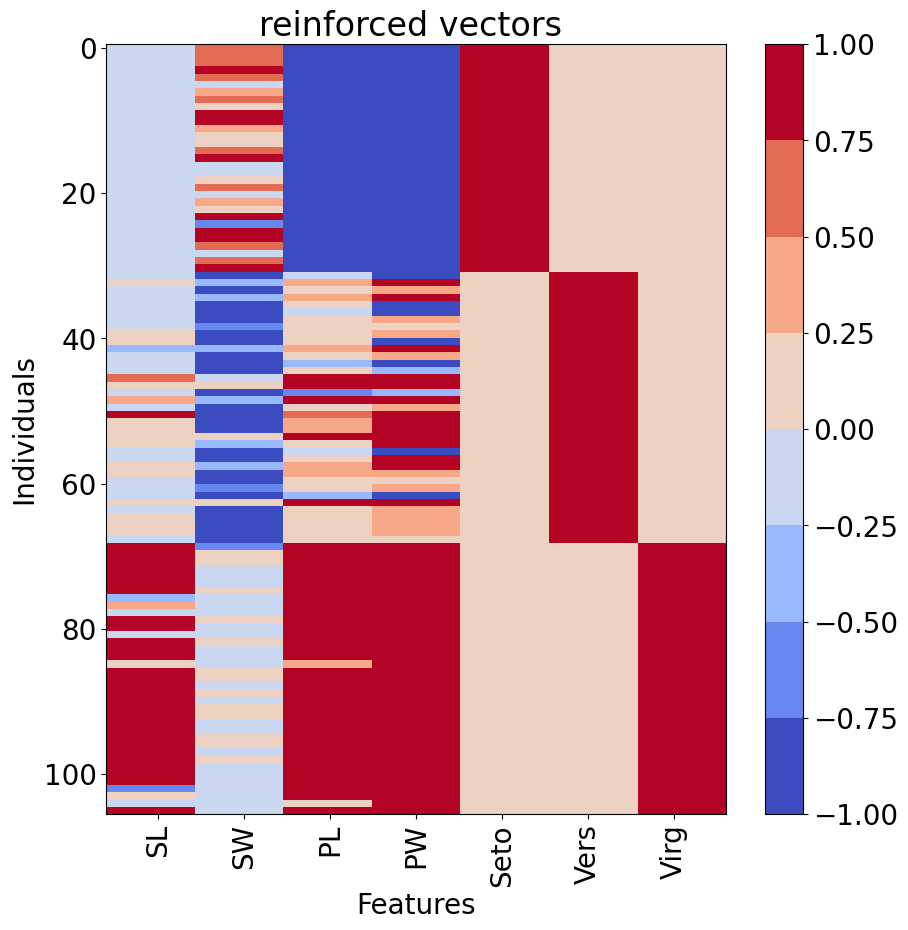

In [44]:

weights = np.concatenate((reinforced_vector_part_3,reinforced_vector_part_2,reinforced_vector_part_1),axis = 0)
plt.figure(figsize=(10,10))
plt.imshow(weights, cmap='coolwarm', aspect='auto', extent=[0,weights.shape[1],weights.shape[0],0])

X_plot, Y_plot = np.meshgrid(np.linspace(0, weights.shape[1], weights.shape[1]), np.linspace(0, weights.shape[0], weights.shape[0]))
Z_plot = weights
# With out-of-bounds colors:
bounds = np.linspace(-1, 1, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = plt.pcolormesh(X_plot, Y_plot, Z_plot, norm=norm, cmap='coolwarm')
# The colorbar inherits the "extend" argument from BoundaryNorm.
plt.colorbar(pcm, orientation='vertical')
plt.title(f'reinforced vectors ')
plt.xlabel('Features')
plt.ylabel('Individuals')
x_ticks = np.linspace(0.1,weights.shape[1]-0.1,weights.shape[1])
x_tick_labels = list(feature_names) + list(target_names)
plt.xticks(x_ticks, x_tick_labels, rotation=90)
plt.savefig(fname = f"reinforcement vector_sorted.png", bbox_inches='tight', pad_inches=0.1,dpi = 300)
plt.show()

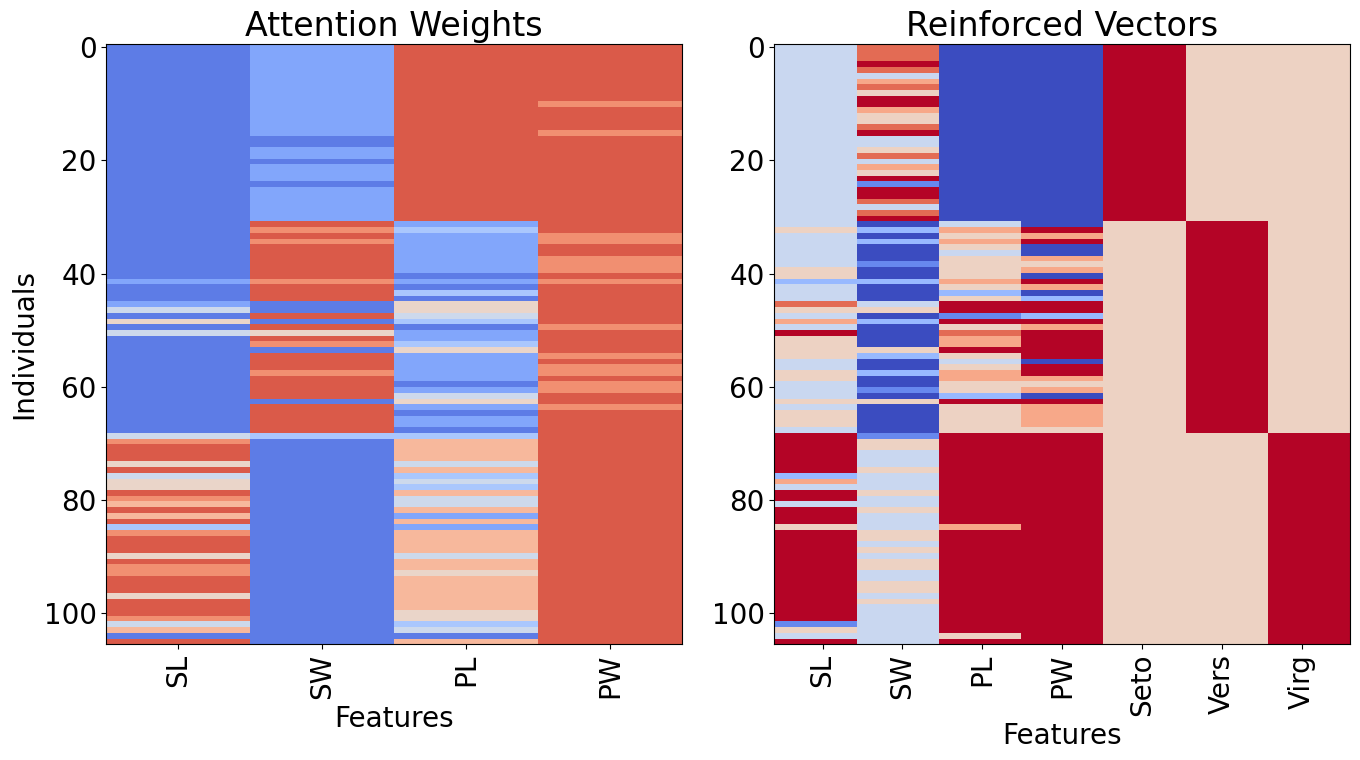

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

sorted_data = sorted(combined_list, key=lambda x: x[1].tolist(), reverse=True)
sorted_attention_wts = [x[0] for x in sorted_data]
attention_weights_sorted = np.array(sorted_attention_wts)
num_rows, num_cols = attention_weights_sorted.shape
weights_attention = attention_weights_sorted.reshape(num_rows, num_cols)

weights_reinforced = np.concatenate((reinforced_vector_part_3, reinforced_vector_part_2, reinforced_vector_part_1), axis=0)


fig, axs = plt.subplots(1, 2, figsize=(14, 8))


axs[0].imshow(weights_attention, cmap='coolwarm', aspect='auto', extent=[0, num_cols, num_rows, 0])

X_plot, Y_plot = np.meshgrid(np.linspace(0, num_cols, num_cols), np.linspace(0, num_rows, num_rows))
Z_plot = weights_attention

bounds = np.linspace(0, 4, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend="both")
pcm = axs[0].pcolormesh(X_plot, Y_plot, Z_plot, norm=norm, cmap='coolwarm')

axs[0].set_title(f'Attention Weights')
axs[0].set_xlabel('Features')
axs[0].set_ylabel('Individuals')

x_ticks = np.linspace(0, num_cols, num_cols)
x_tick_labels = list(feature_names)
axs[0].set_xticks(x_ticks)
axs[0].set_xticklabels(x_tick_labels, rotation=90)

# Plotting reinforced vectors
axs[1].imshow(weights_reinforced, cmap='coolwarm', aspect='auto', extent=[0, weights_reinforced.shape[1], weights_reinforced.shape[0], 0])

X_plot, Y_plot = np.meshgrid(np.linspace(0, weights_reinforced.shape[1], weights_reinforced.shape[1]),
                             np.linspace(0, weights_reinforced.shape[0], weights_reinforced.shape[0]))
Z_plot = weights_reinforced

bounds = np.linspace(-1, 1, 9)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
pcm = axs[1].pcolormesh(X_plot, Y_plot, Z_plot, norm=norm, cmap='coolwarm')

axs[1].set_title(f'Reinforced Vectors')
axs[1].set_xlabel('Features')

x_ticks = np.linspace(0.1, weights_reinforced.shape[1] - 0.1, weights_reinforced.shape[1])
x_tick_labels = list(feature_names) + list(target_names)
axs[1].set_xticks(x_ticks)
axs[1].set_xticklabels(x_tick_labels, rotation=90)

# Adjust layout
plt.tight_layout()

# Save figure
plt.savefig(fname=f"Attention_and_Reinforcement_vectors.png", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()


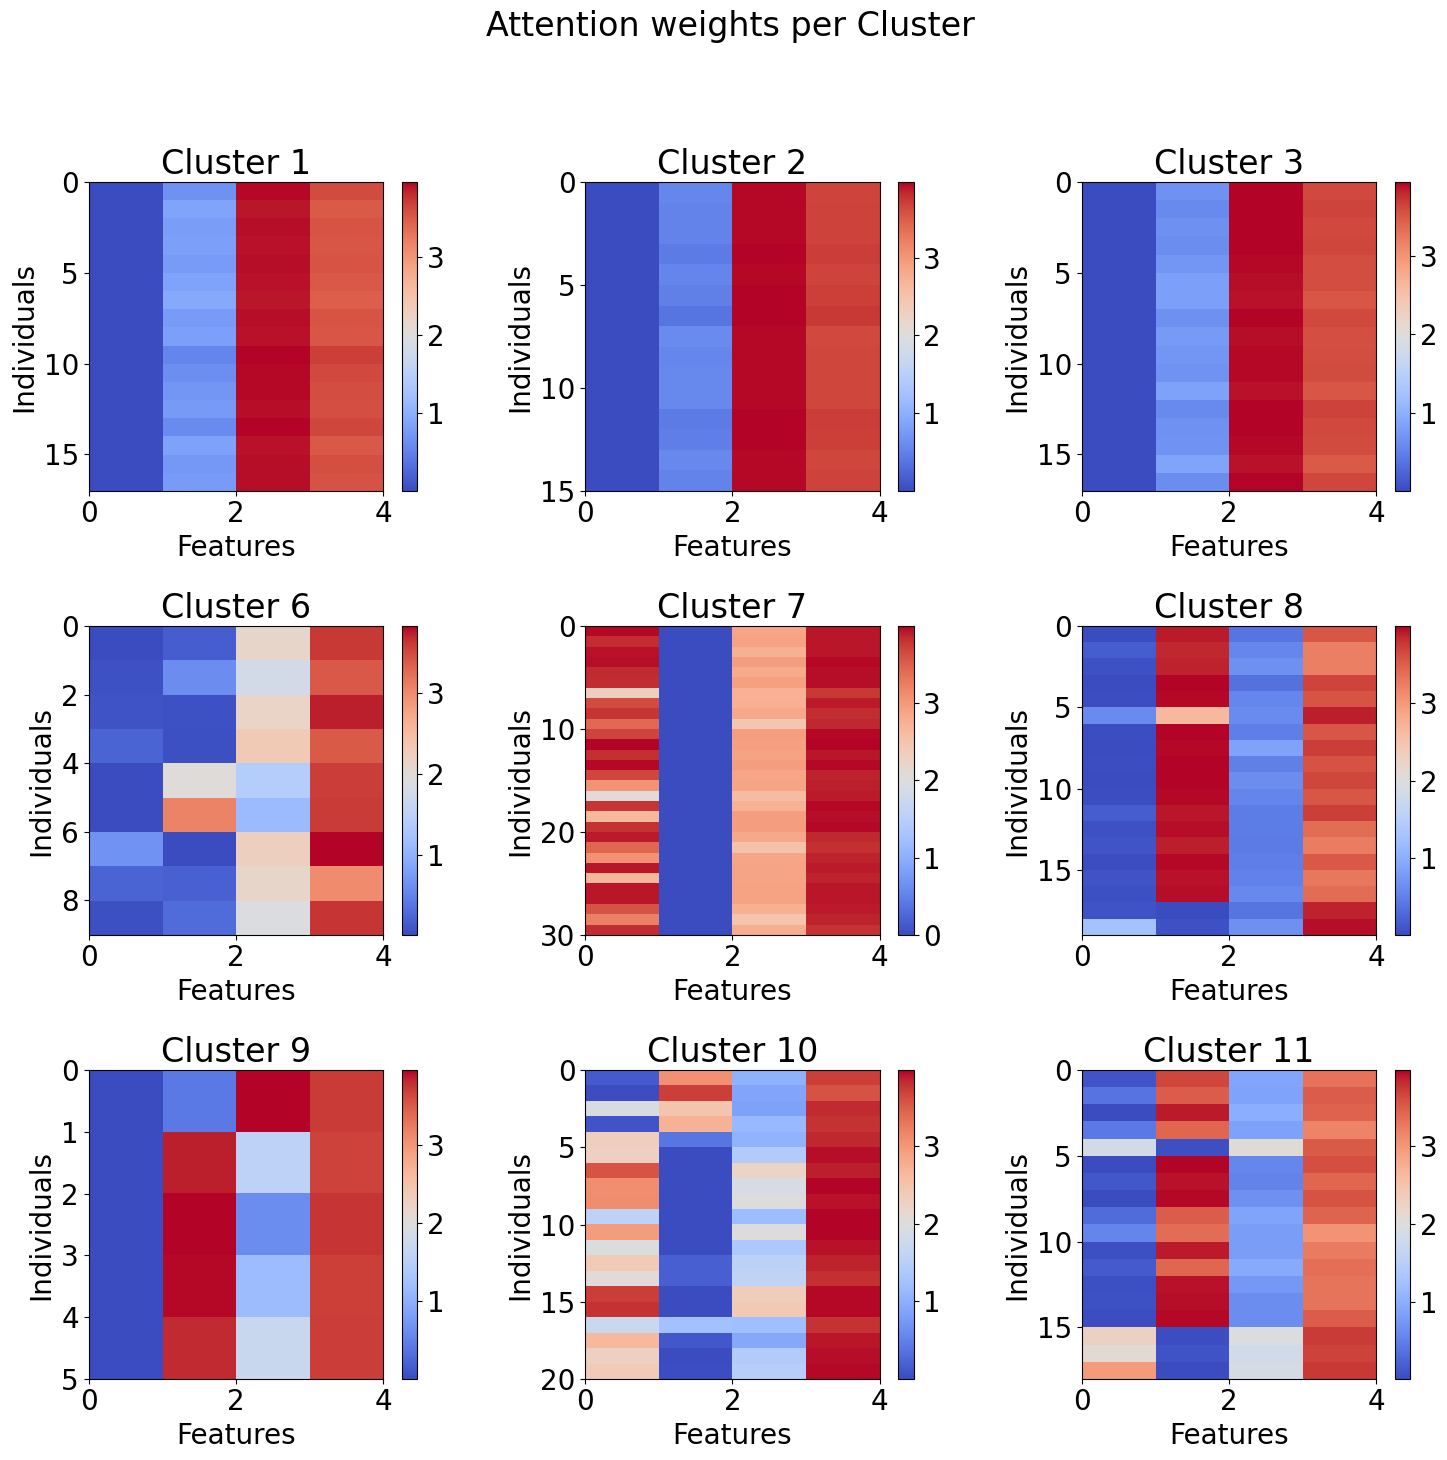

In [46]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 rows, 4 columns
plt.suptitle("Attention weights per Cluster")  

for index, cls in enumerate(np.unique(classification)):
    X_ = X_scaled[np.where(np.array(classification) == cls)[0], :]
    attn_wts = []
    for i, j in zip(X_, layer_model.model_([X_, X_]).numpy()):
        attn_wts.append(j / i)
    attention_weights = np.array(attn_wts)

    row = index // 3  # Calculate the row index in the 3x4 grid
    col = index % 3  # Calculate the column index in the 3x4 grid
    num_rows, num_cols = attention_weights.shape
    weights = attention_weights.reshape(num_rows, num_cols)
    ax = axes[row, col]  # Access the correct subplot in the grid
    im = ax.imshow(weights, cmap='coolwarm', aspect='auto', extent=[0, weights.shape[1], weights.shape[0], 0])
    ax.set_title('Cluster {}'.format(cls))
    ax.set_xlabel('Features')
    ax.set_ylabel('Individuals')

    fig.colorbar(im, ax=ax)

plt.tight_layout(rect=[0,0, 1, 0.95])  # Adjust layout and suptitle position
plt.savefig(fname = f"attention-cluster.png" 
            ,bbox_inches = "tight", pad_inches=0.1,dpi = 300)
plt.show()
